# Proyecto Final
Métodos Computacionales para Políticas Públicas - URosario

<div class="alert alert-success">
**[José Gabriel Astaiza Gómez]** <br><br>
[jose.astaiza@urosario.edu.co]
</div>

---

# Importación de librerías

In [1]:
print('importando librerías...espere ')
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import time
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy
import numpy as np
import math
import statsmodels.formula.api as sm


print('done')

importando librerías...espere 
done


# Lectura de páginas con Beautifulsoup

In [2]:
print('leyendo páginas web...espere')
#Datos de riesgo
base_url = "http://www.usbanklocations.com/bank-rank/tier-1-risk-based-capital-ratio---performanceratios--pcr-rbc1rwaj.html"
index_html = urlopen(base_url)
index = BeautifulSoup(index_html, "lxml")

#Datos de depósitos
base1_url = "http://www.usbanklocations.com/bank-rank/demand-deposits---totaldeposits--td-ddt.html"
index1_html = urlopen(base1_url)
index1 = BeautifulSoup(index1_html, "lxml")

print('done')

leyendo páginas web...espere
done


# Creación de listas con observaciones de riesgos y depósitos

In [3]:
print('Constuyendo listas con risk ratios y depósitos a la vista...')

#Risk ratios
datos=index.find_all("tr")
risk_ratios=[]
for x in range(2,len(datos)): 
    linea=datos[x].get_text('/td') #Obneter las líneas indexadas con </td> en código html de la página   
    numero=re.findall('d([^ ]+)%',linea) #De cada línea obtener los dígitos después del caracter 'd' y antes de '%'
    numero=numero[0].replace(",", "") #Eliminar las comas como separador de miles 
    risk_ratios.append(numero) #Agregar los dígitos obtenidos en la lista risk_ratios
for x in range(0,len(risk_ratios)): #Los dígitos son strings. Convertirlos a floats para operaciones.
    risk_ratios[x]=float(risk_ratios[x])
    
#Depósitos a la vista
datos1=index1.find_all("tr")
demand_deposits=[]
for x in range(2,len(datos1)):
    linea=datos1[x].get_text('/td')   
    numero=re.findall('\$([^ ]+)\/',linea)
    numero=numero[0].replace(",", "")
    demand_deposits.append(numero)
for x in range(0,len(demand_deposits)):
    demand_deposits[x]=float(demand_deposits[x])
    demand_deposits[x]=(demand_deposits[x])/1000000 #se divide entre 1000000 para que la escala sea manejable gráficamente

#Depósitos en logaritmos
log_demand_deposits=[]
for x in range(2,len(datos1)):
    linea=datos1[x].get_text('/td')   
    numero=re.findall('\$([^ ]+)\/',linea)
    numero=numero[0].replace(",", "")
    log_demand_deposits.append(numero)
for x in range(0,len(demand_deposits)):
    log_demand_deposits[x]=float(log_demand_deposits[x])
    if log_demand_deposits[x]>0: #Convertir los números a logaritmos. Algunos depósitos son cero. El log está definido para positivos.
        log_demand_deposits[x]=math.log(log_demand_deposits[x])
    else:
        log_demand_deposits[x]=math.log(0.01) #Aproximar a cero por la derecha y tomar el logaritmo para graficar.
        
print('done')


Constuyendo listas con risk ratios y depósitos a la vista...
done


# Creación de listas con los nombres de los bancos

In [4]:
print('Construyendo dos listas con nombres de bancos ...')

# De cada página se obtienen los nombres de los bancos para garantizar que se puede
# cruzar la información sin confundir los datos

#Con la web-page de riesgos. Está cargada en 'datos'
bancos=[]
for x in range(2,len(datos)):
    linea=datos[x].get_text('/td')   
    banco=re.findall('%/td([\w+].+)',linea)
    bancos.append(banco)
for x in range(0,len(bancos)):
    bancos[x]=str(bancos[x])
    bancos[x]=bancos[x].replace("[", "")
    bancos[x]=bancos[x].replace("]", "")
    bancos[x]=bancos[x].replace("'", "")
    bancos[x]=bancos[x].replace('"', "")

#Con la web-page de depósitos. Está cargada en 'datos1'

bancos1=[]
for x in range(2,len(datos1)):
    linea=datos1[x].get_text('/td')   
    banco=re.findall('0/td([\w+].+)',linea)
    bancos1.append(banco)
for x in range(0,len(bancos1)):
    bancos1[x]=str(bancos1[x])
    bancos1[x]=bancos1[x].replace("[", "")
    bancos1[x]=bancos1[x].replace("]", "")
    bancos1[x]=bancos1[x].replace("'", "")
    bancos1[x]=bancos1[x].replace(",", "")
    bancos1[x]=bancos1[x].replace("$", "")
    bancos1[x]=bancos1[x].replace('"', "")

print('done')

Construyendo dos listas con nombres de bancos ...
done


# Verificación del número de observaciones

In [5]:
print('El número de bancos con info de riesgos es ',len(bancos))
print('El número de bancos con info de depósitos es ',len(bancos1))
print('El número de ratios es ',len(risk_ratios))
print('El número de datos de depósitos es ',len(demand_deposits))

El número de bancos con info de riesgos es  6058
El número de bancos con info de depósitos es  6058
El número de ratios es  6058
El número de datos de depósitos es  6058


# Construcción de DataFrames

In [6]:
print('construyendo Data Frames de Bancos-Riesgos y Bancos-Depósitos...')

#Con información de Riesgos
df1=pd.DataFrame({'Bancos': bancos})
df2=pd.DataFrame({'Riesgo': risk_ratios})
Datos=pd.concat([df1,df2], ignore_index=False, axis=1)
base=Datos.sort_values(by='Bancos', ascending=1) # Ordeno la base alfabéticamente según el nombre de los bancos

#Con información de Depósitos
df11=pd.DataFrame({'Bancos': bancos1})
df12=pd.DataFrame({'Depositos': demand_deposits})
Datos1=pd.concat([df11,df12], ignore_index=False, axis=1)
Base1=Datos1.sort_values(by='Bancos', ascending=1) # Ordeno la base alfabéticamente según el nombre de los bancos

#Con inforación de Depósitos en logaritmos
df21=pd.DataFrame({'Bancos': bancos1})
df22=pd.DataFrame({'LogDepositos': log_demand_deposits})
Datos2=pd.concat([df21,df22], ignore_index=False, axis=1)
Base2=Datos2.sort_values(by='Bancos', ascending=1) # Ordeno la base alfabéticamente según el nombre de los bancos
print('done')

print('construyendo Data Frame con riesgo y depósitos para cada banco...')
base['Depositos']=Base1['Depositos'] #Agrego las observaciones de depósitos a la base Bancos-Riesgos
base['LogDepositos']=Base2['LogDepositos'] #Agrego las observaciones de log depósitos a la base Bancos-Riesgos
print('done')


construyendo Data Frames de Bancos-Riesgos y Bancos-Depósitos...
done
construyendo Data Frame con riesgo y depósitos para cada banco...
done


# Mostrando data frame

In [7]:
print('La base de datos de los bancos americanos con su respectivo índice de riesgo y nivel de depósitos en dólares y en logarítmos se muestra abajo.')

#Crear base de datos sin outlier de Riesgo
print('El outlier de Riesgo está en la posición ',np.where(base['Riesgo']==36197.2973)[0],' y corresponde a HSBC,Delaware (36197%,500.000$). El segundo riesgo más alto es apenas 868.6%.')
outlier=base.drop(base.index[2768])
base

La base de datos de los bancos americanos con su respectivo índice de riesgo y nivel de depósitos en dólares y en logarítmos se muestra abajo.
El outlier de Riesgo está en la posición  [2768]  y corresponde a HSBC,Delaware (36197%,500.000$). El segundo riesgo más alto es apenas 868.6%.


,Bancos,Riesgo,Depositos,LogDepositos
2440,1880 Bank,16.4798,33.650,17.331524
5967,1st Advantage Bank,9.3839,0.027,10.203592
1301,1st Bank,20.7369,63.551,17.967353
3435,1st Bank & Trust,14.2999,21.449,16.881189
4778,1st Bank Yuma,12.0775,10.688,16.184632
2473,1st Bank of Sea Isle City,16.3739,33.073,17.314228
1339,1st Cameron State Bank,20.5360,62.087,17.944047
3928,1st Capital Bank,13.4718,16.972,16.647075
5961,1st Century Bank,9.4275,0.064,11.066638
5608,1st Colonial Community Bank,10.6431,4.317,15.278071


# Creación de las estadísticas descriptivas

In [8]:
print('Las estadísticas descriptivas de la base completa son:')
print(base.describe(percentiles=None, include=None, exclude=None),'\n')
print('Las estadísticas descriptivas de la base sin outlier son:')
print(outlier.describe(percentiles=None, include=None, exclude=None))

Las estadísticas descriptivas de la base completa son:
             Riesgo      Depositos  LogDepositos
count   6058.000000    6058.000000   6058.000000
mean      25.402773     260.465357     16.823795
std      465.535237    4658.603264      2.944915
min        1.594700       0.000000     -4.605170
25%       12.478850      12.457000     16.337793
50%       15.109700      25.842000     17.067512
75%       19.728750      55.820250     17.837647
max    36197.297300  258094.000000     26.276590 

Las estadísticas descriptivas de la base sin outlier son:
            Riesgo      Depositos  LogDepositos
count  6057.000000    6057.000000   6057.000000
mean     19.430857     217.897496     16.822234
std      25.922823    3275.228433      2.942652
min       1.594700       0.000000     -4.605170
25%      12.478500      12.457000     16.337793
50%      15.109400      25.839000     17.067396
75%      19.724400      55.815000     17.837553
max     868.623800  144521.000000     25.696691


# Creación de las distribuciones de riesgo y depósitos

La distribución de riesgos entre los bancos americanos sin HSBC es:


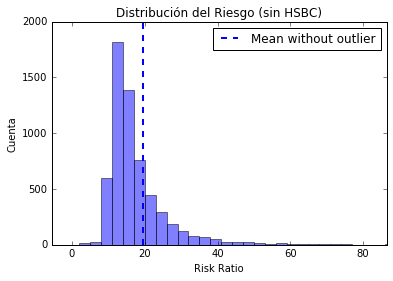

La distribución de riesgos entre los bancos americanos (base completa) es:


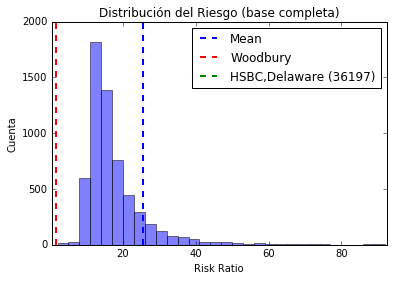

Se puede observar que la distribución está sesgada por lo que la mayor parte de los bancos tienen un nivel de riesgo de impago menor al promedio (dashed line)


In [18]:
print('La distribución de riesgos entre los bancos americanos sin HSBC es:')
%matplotlib inline



#Gráfico 1 Sin outlier
#Tipo de gráfico
bins = np.arange(-100, 100, 3) 
plt.xlim([numpy.mean(outlier['Riesgo'])-25, numpy.mean(outlier['Riesgo'])+67])
plt.hist(risk_ratios,bins=bins, alpha=0.5)

#Título y nombres de ejes
plt.title('Distribución del Riesgo (sin HSBC)')
plt.xlabel('Risk Ratio')
plt.ylabel('Cuenta')
plt.axvline(numpy.mean(outlier['Riesgo']), color='b', linestyle='dashed', linewidth=2, label='Mean without outlier')
plt.legend(loc=0)
plt.show()

print('La distribución de riesgos entre los bancos americanos (base completa) es:')

#Gráfico 2 base completa
#Tipo de gráfico
bins = np.arange(-100, 100, 3) 
plt.xlim([numpy.mean(risk_ratios)-25, numpy.mean(risk_ratios)+67])
plt.hist(risk_ratios,bins=bins, alpha=0.5)

#Título y nombres de ejes
plt.title('Distribución del Riesgo (base completa)')
plt.xlabel('Risk Ratio')
plt.ylabel('Cuenta')

#Líneas verticales
plt.axvline(numpy.mean(base['Riesgo']), color='b', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(min(base['Riesgo']), color='r', linestyle='dashed', linewidth=2,label='Woodbury')
plt.axvline(max(base['Riesgo']), color='g', linestyle='dashed', linewidth=2,label='HSBC,Delaware (36197)')
plt.legend(loc=0)

plt.show()

print('Se puede observar que la distribución está sesgada por lo que la mayor parte de los bancos tienen un nivel de riesgo de impago menor al promedio (dashed line)')

La distribución del nivel de depósitos entre los bancos americanos es:


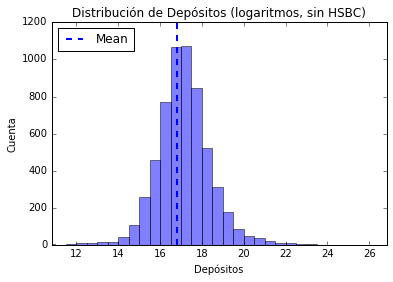

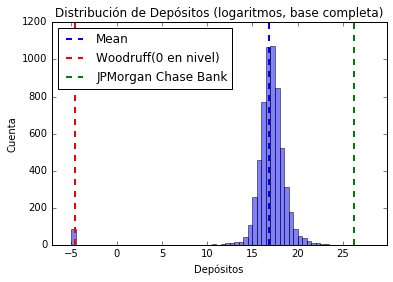

Se puede observar en la distribución que la mayor parte de los bancos tienen un nivel de depósitos en logaritmos mayor al promedio (dashed line)


In [19]:
print('La distribución del nivel de depósitos entre los bancos americanos es:')
%matplotlib inline

#Gráfico 1 sin HSBC
bins = np.arange(-100, 100, 0.5) 
plt.xlim([numpy.mean(outlier['LogDepositos'])-6, numpy.mean(outlier['LogDepositos'])+10])
plt.hist(log_demand_deposits,bins=bins, alpha=0.5)

plt.title('Distribución de Depósitos (logaritmos, sin HSBC)')
plt.xlabel('Depósitos')
plt.ylabel('Cuenta')
plt.axvline(numpy.mean(outlier['LogDepositos']), color='b', linestyle='dashed', linewidth=2,label='Mean')
plt.legend(loc=2)

plt.show()

#Gráfico 2 base completa
bins = np.arange(-100, 100, 0.5) 
plt.xlim([numpy.mean(log_demand_deposits)-24, numpy.mean(log_demand_deposits)+13])
plt.hist(log_demand_deposits,bins=bins, alpha=0.5)

plt.title('Distribución de Depósitos (logaritmos, base completa)')
plt.xlabel('Depósitos')
plt.ylabel('Cuenta')

plt.axvline(numpy.mean(log_demand_deposits), color='b', linestyle='dashed', linewidth=2,label='Mean')
plt.axvline(min(log_demand_deposits), color='r', linestyle='dashed', linewidth=2,label='Woodruff(0 en nivel)')
plt.axvline(max(log_demand_deposits), color='g', linestyle='dashed', linewidth=2,label='JPMorgan Chase Bank')

plt.legend(loc=2)

plt.show()

print('Se puede observar en la distribución que la mayor parte de los bancos tienen un nivel de depósitos en logaritmos mayor al promedio (dashed line)')

La distribución del nivel de depósitos entre los bancos americanos es:


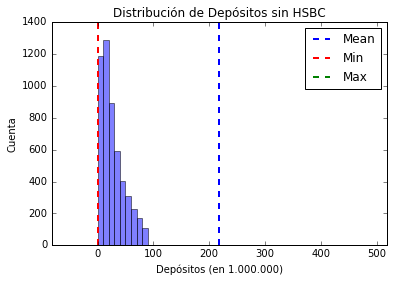

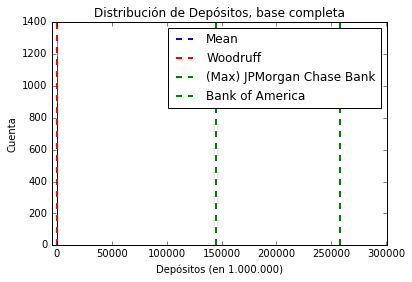

Se puede observar en la distribución que la mayor parte de los bancos tienen un nivel de depósitos en logaritmos mayor al promedio (dashed line)


In [20]:
print('La distribución del nivel de depósitos entre los bancos americanos es:')
%matplotlib inline

#Gráfico1 sin HSBC
bins = np.arange(-100, 100, 10) 
plt.xlim([numpy.mean(outlier['Depositos'])-300, numpy.mean(outlier['Depositos'])+300])
plt.hist(demand_deposits,bins=bins, alpha=0.5)

plt.title('Distribución de Depósitos sin HSBC')
plt.xlabel('Depósitos (en 1.000.000)')
plt.ylabel('Cuenta')

plt.axvline(numpy.mean(outlier['Depositos']), color='b', linestyle='dashed', linewidth=2,label='Mean')
plt.axvline(min(outlier['Depositos']), color='r', linestyle='dashed', linewidth=2,label='Min')
plt.axvline(max(outlier['Depositos']), color='g', linestyle='dashed', linewidth=2,label='Max')
plt.legend()
plt.show()

#Gráfico 2 base completa
bins = np.arange(-100, 100, 10) 
plt.xlim([numpy.mean(demand_deposits)-5000, numpy.mean(demand_deposits)+300000])
plt.hist(demand_deposits,bins=bins, alpha=0.5)

plt.title('Distribución de Depósitos, base completa')
plt.xlabel('Depósitos (en 1.000.000)')
plt.ylabel('Cuenta')

plt.axvline(numpy.mean(demand_deposits), color='b', linestyle='dashed', linewidth=2,label='Mean')
plt.axvline(min(demand_deposits), color='r', linestyle='dashed', linewidth=2,label='Woodruff')
plt.axvline(max(demand_deposits), color='g', linestyle='dashed', linewidth=2,label='(Max) JPMorgan Chase Bank')
plt.axvline(144521, color='g', linestyle='dashed', linewidth=2,label='Bank of America')
plt.legend()
plt.show()


print('Se puede observar en la distribución que la mayor parte de los bancos tienen un nivel de depósitos en logaritmos mayor al promedio (dashed line)')

# Scatter plots en LogDepósitos

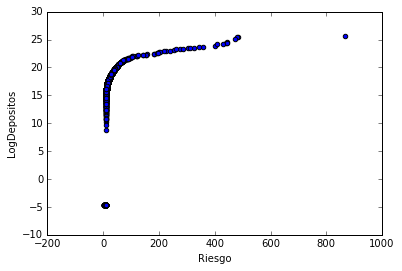

In [21]:
outlier.plot(x='Riesgo', y='LogDepositos', kind='scatter')
plt.show()

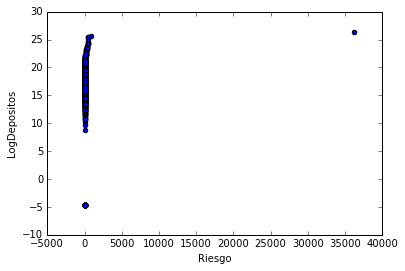

In [22]:
base.plot(x='Riesgo', y='LogDepositos', kind='scatter')
plt.show()

# Scatter plots de Depósito en niveles

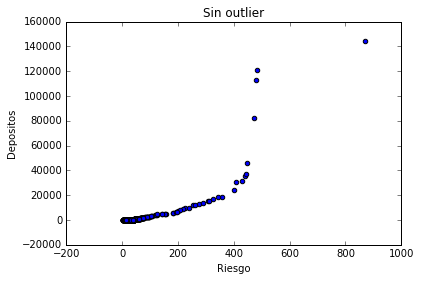

In [23]:
outlier.plot(title='Sin outlier', x='Riesgo', y='Depositos', kind='scatter')
plt.show()

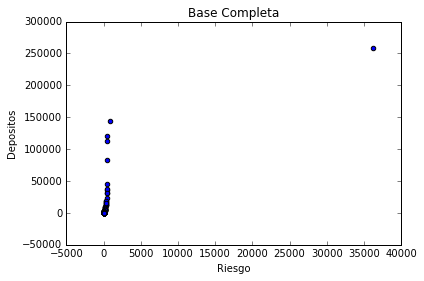

In [24]:
base.plot(title='Base Completa',x='Riesgo', y='Depositos', kind='scatter')
plt.show()

# Relaciones lineales. Muestra total.

In [25]:
#Respecto a Depósitos en niveles
result = sm.ols(formula="Depositos ~ Riesgo", data=base).fit()
print(result.params)

Intercept    71.877920
Riesgo        7.423892
dtype: float64


In [26]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Depositos   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     7413.
Date:                Mon, 14 Nov 2016   Prob (F-statistic):               0.00
Time:                        15:16:20   Log-Likelihood:                -57343.
No. Observations:                6058   AIC:                         1.147e+05
Df Residuals:                    6056   BIC:                         1.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     71.8779     40.197      1.788      0.0

In [27]:
#Respecto a Depósitos en logaritmos
result = sm.ols(formula="LogDepositos ~ Riesgo", data=base).fit()
print(result.params)

Intercept    16.814263
Riesgo        0.000375
dtype: float64


# Relaciones lineales. Muestra sin outlier (HSBC Trust Company (Delaware))

In [28]:
#Respecto a Depósitos en niveles
result1 = sm.ols(formula="Depositos ~ Riesgo", data=outlier).fit()
print(result1.params)


Intercept   -1775.102389
Riesgo        102.568809
dtype: float64


In [29]:
print(result1.summary()) #El R cuad aumenta considerablemente

                            OLS Regression Results                            
Dep. Variable:              Depositos   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 1.170e+04
Date:                Mon, 14 Nov 2016   Prob (F-statistic):               0.00
Time:                        15:16:24   Log-Likelihood:                -54362.
No. Observations:                6057   AIC:                         1.087e+05
Df Residuals:                    6055   BIC:                         1.087e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1775.1024     30.714    -57.795      0.0